# Tarea 1
## Fundamentos Matemáticos para la Inteligencia Artificial
### IMT3850 2023
__Alumno: Sebastián Valenzuela T.__

### Pregunta 1: Normas

Demuestre la siguiente identidad de acuerdo a las definiciones vistas en la clase 1:

$rms(x)^2=avg(x)^2+std(x)^2$

#### Desarrollo

Demostrar la identidad anterior es equivalente a demostrar lo siguiente:

$std(x)^2=rms(x)^2-avg(x)^2$

Sabemos por definición que:
$std(x)^2= \dfrac{1}{n}||x-(\textbf{1}^T  \dfrac{x}{n})\textbf{1}||$

$std(x)^2= \dfrac{1}{n}(x^T x-2x^T(\textbf{1}^T  \dfrac{x}{n})\textbf{1}+((\textbf{1}^T  \dfrac{x}{n})\textbf{1})^T ((\textbf{1}^T  \dfrac{x}{n})\textbf{1})))$

$std(x)^2= \dfrac{1}{n}(x^T x-\dfrac{2}{n}(\textbf{1}^T x)^2+ n(\textbf{1}^T  \dfrac{x}{n})^2)$

$std(x)^2= \dfrac{1}{n}x^T x-(\textbf{1}^T  \dfrac{x}{n})^2$

Reemplazando la definición de cada uno de estos 2 términos, esta expresión es entonces igual a:

$std(x)^2=rms(x)^2-avg(x)^2$

Quedando así demostrada la igualdad, y por lo tanto la identidad $rms(x)^2=avg(x)^2+std(x)^2$

### Pregunta 2: Aplicacion de algoritmo k-means.

In [358]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import random as ran

In [288]:
data = np.genfromtxt('datakmeans.csv', delimiter=',')

In [289]:
data

array([[  0.        ,   1.        ],
       [ -1.06807319,  -0.82189648],
       [ -1.3049824 ,  -1.04031929],
       ...,
       [ -1.70241253,  -3.09962347],
       [  1.18655212,  -4.4719841 ],
       [ -6.52727426, -11.91843775]])

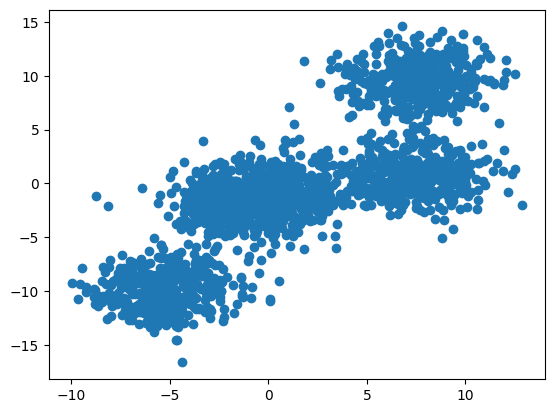

In [290]:
plt.scatter([x[0] for x in data],[x[1] for x in data])
#plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

#### a) Algoritmo k-means
Aquí está el algoritmo de k-means que utilizaré y que corresponde con lo solicitado en el enunciado, donde adicionalmente debe indicarse el valor de k clusters (que pueden definirse previamente como en este caso, donde se definió ya previamente el valor de k=5):

In [354]:
#Algoritmo k-means
def rep_iniciales(K, X, semilla=0):
    """Entrega los representantes iniciales"""
   
    representantes = X[np.random.RandomState(semilla).permutation(X.shape[0])[:K]]
    return representantes, K

def vecino_mas_cercano(x, representantes):
    """Entrega el índice del vecino más cercano a de cada representante."""
    distancias = np.linalg.norm(representantes - x, axis=1)
    return np.argmin(distancias)

def crear_clusters(X, representantes):
    """Se crean clusters con los índices del vecino más cercano."""
    cluster_idx = np.apply_along_axis(vecino_mas_cercano, 1, X, representantes)
    return cluster_idx

def nuevos_representantes(X, K, cluster_idx):
    """Selecciona los datos los elementos del cluster y los promedia
    para conseguir los nuevos representantes del grupo.   
    """
    representantes = np.array([np.mean(X[cluster_idx == i], axis=0) for i in range(K)])
    return representantes

def calcula_jclust(X, clusters_idx, representantes):
    """Calcula la función objetivo a minimizar"""
    distancias = np.linalg.norm(X - representantes[clusters_idx], axis=1)
    jclust = np.sum(distancias) / X.shape[0]
    return jclust

def k_means_fitM(X, Z0, NITERMAX=100):
    """Se itera hasta que se cumpla una de las 2 condiciones: 
    1) que el nuevo representante sea igual al anterior para cada cluster 
    2) que se cumpla el número máximo de iteraciones.
    """
    Zn, K = Z0
    jclust = []
    for niter in range(NITERMAX):        
        clusters= crear_clusters(X, Zn)
        jclust_it = calcula_jclust(X, clusters, Zn)
        jclust.append(jclust_it)
        Z = nuevos_representantes(X, K, clusters)
       
        if np.array_equal(Z, Zn):
            return clusters, Z, jclust
        else:
            Zn = Z
  
    return clusters, Z, jclust

#### b) Base de datos 'datakmeans'
usando la bade de datos 'datameans.csv' y k=5, se tiene lo siguiente:

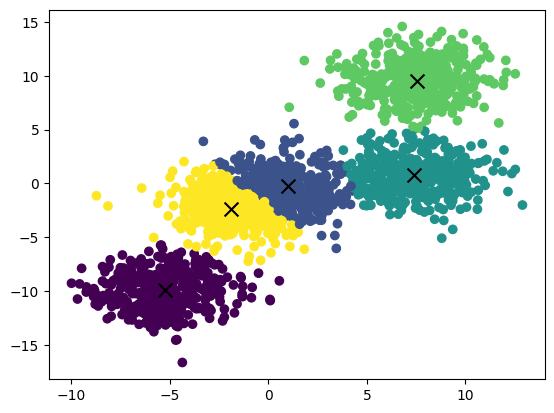

In [359]:
Z0=rep_iniciales(5,data,semilla=400) # selección de los datos correspondientes a los índices aleatorios como centroides iniciales
#calcula  
clusters, rep, jclust = k_means_fitM(data, Z0, NITERMAX=15)
plt.scatter(data[:,0], data[:,1], c=clusters)
plt.scatter(rep[:,0],rep[:,1], c='black', marker='x',s=100)

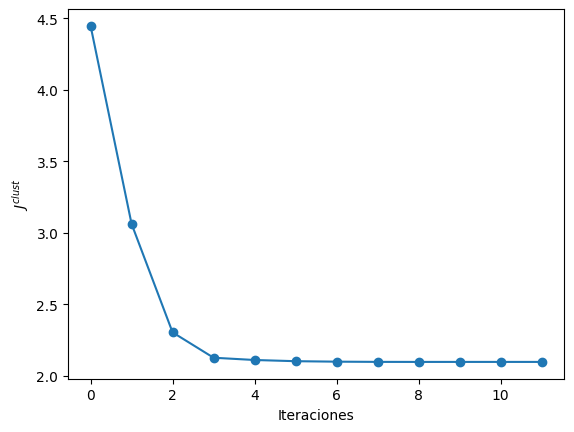

In [360]:
ax = plt.axes()
ax.set_xlabel('Iteraciones')
ax.set_ylabel(r"$J^{clust}$")
plt.plot(jclust, marker='o', )
plt.show()

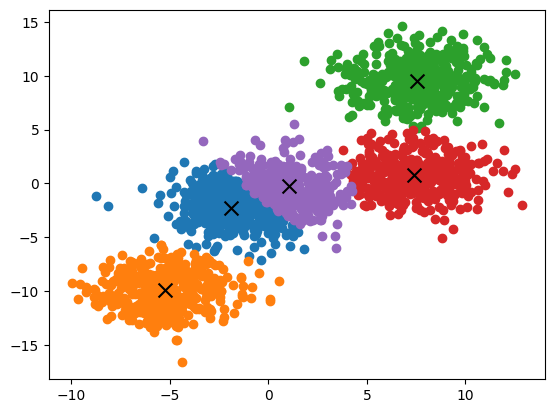

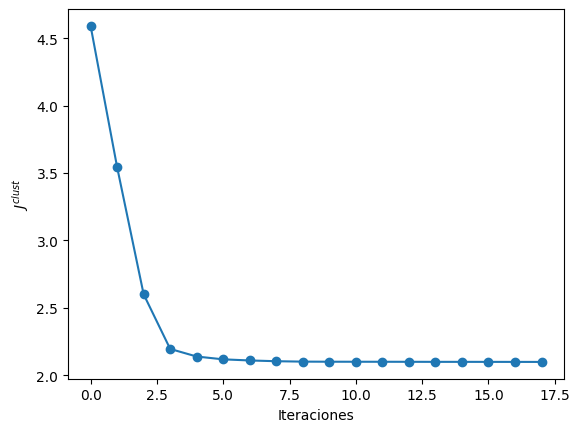

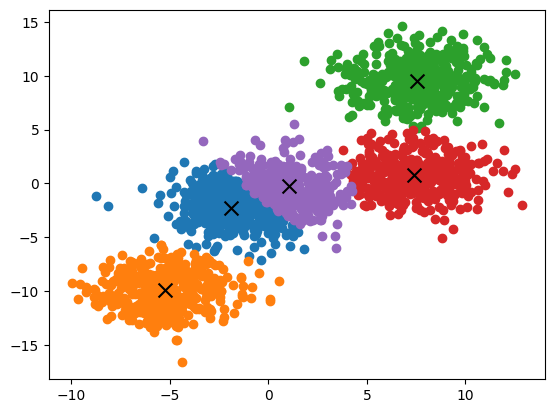

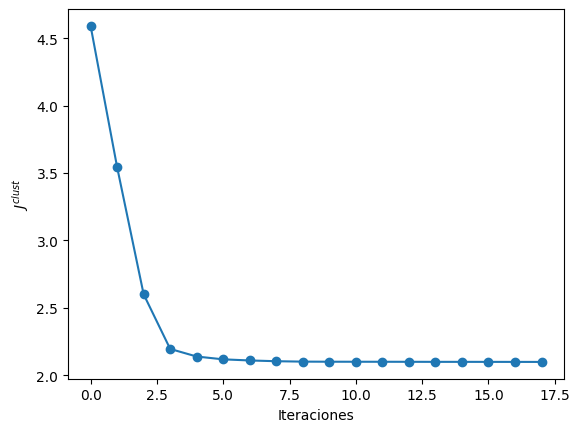

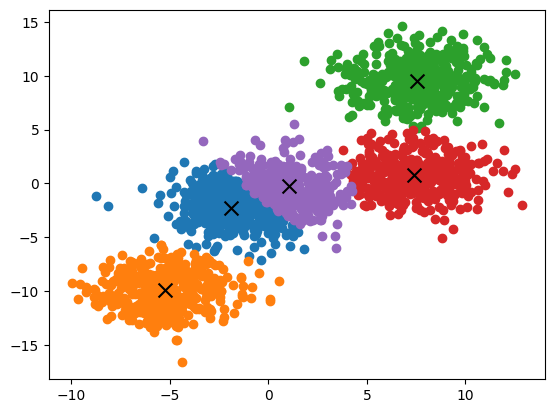

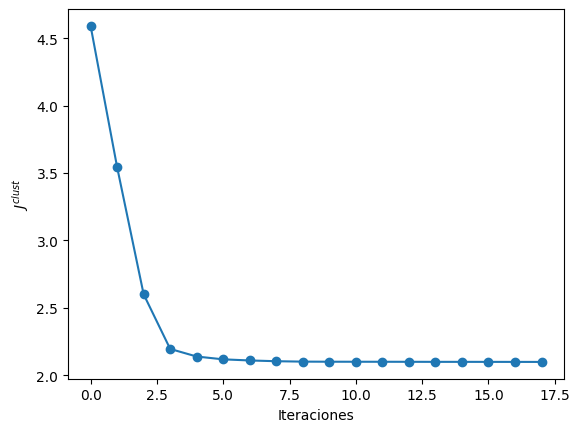

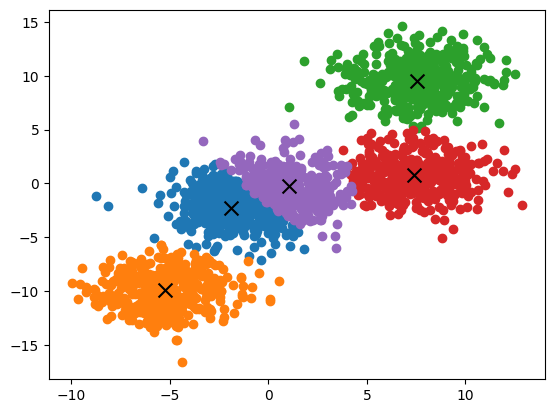

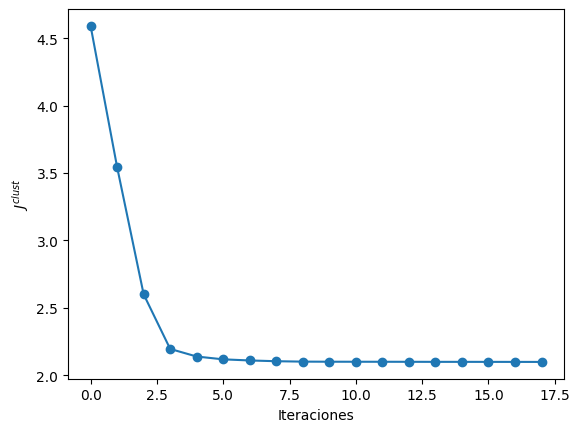

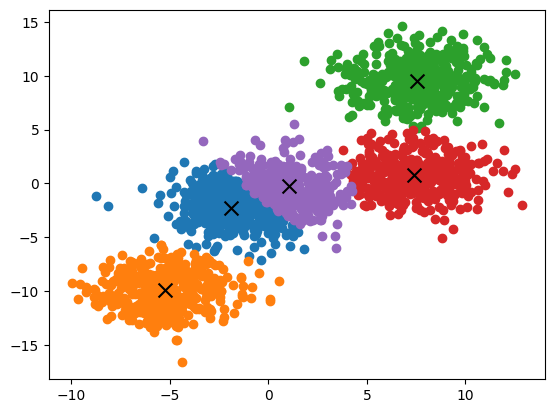

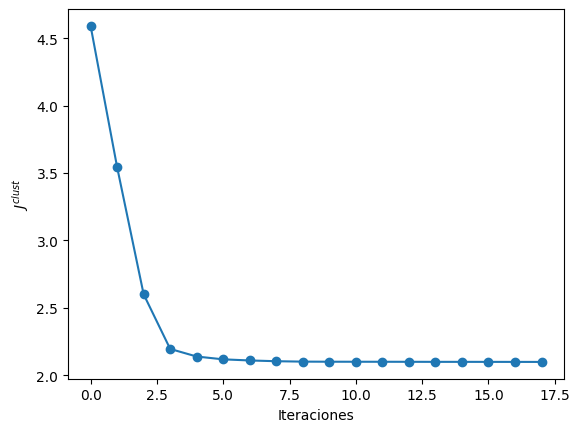

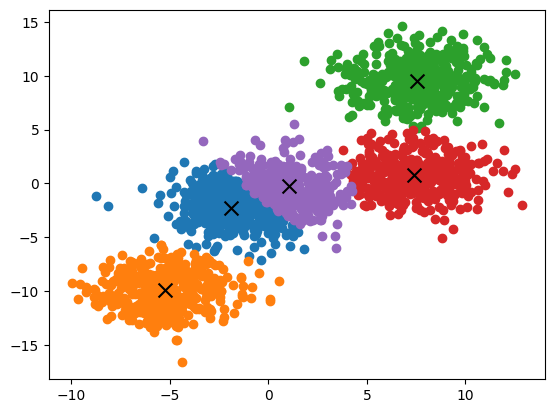

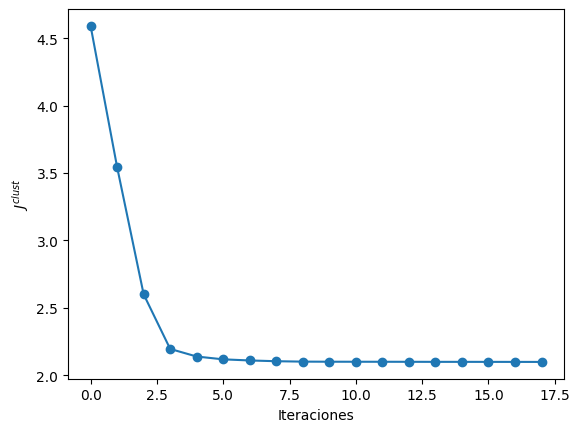

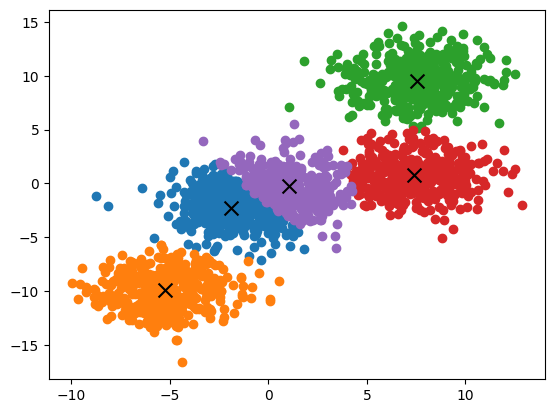

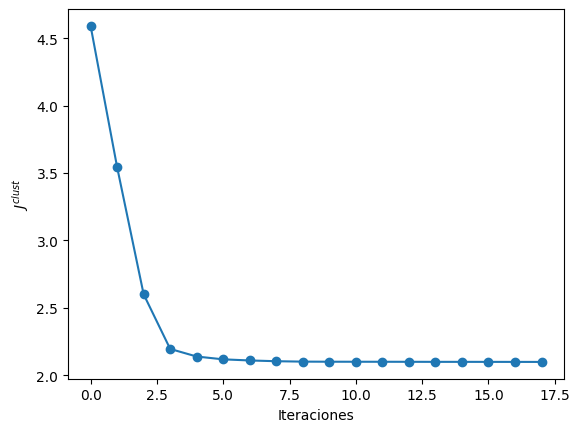

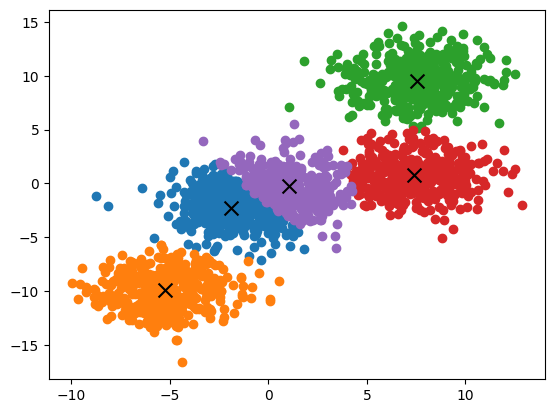

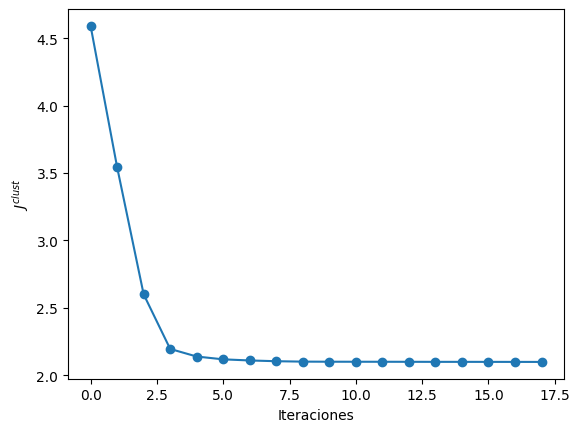

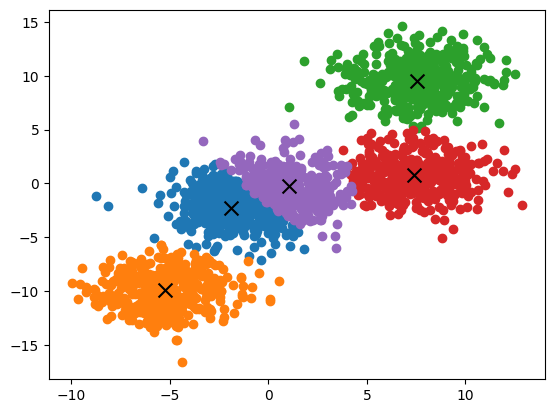

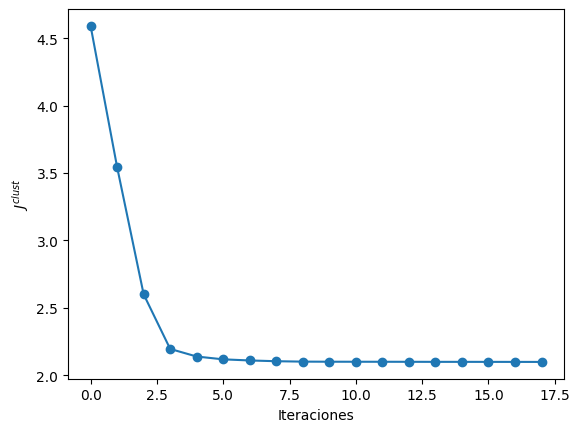

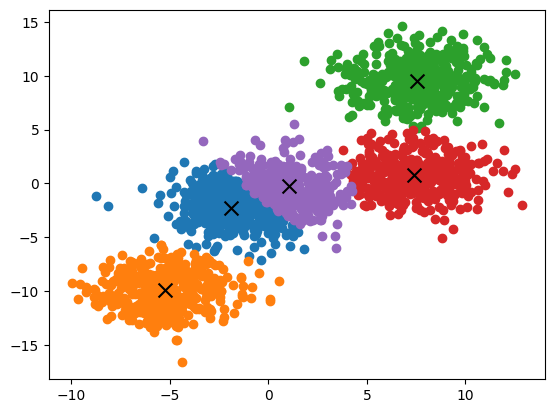

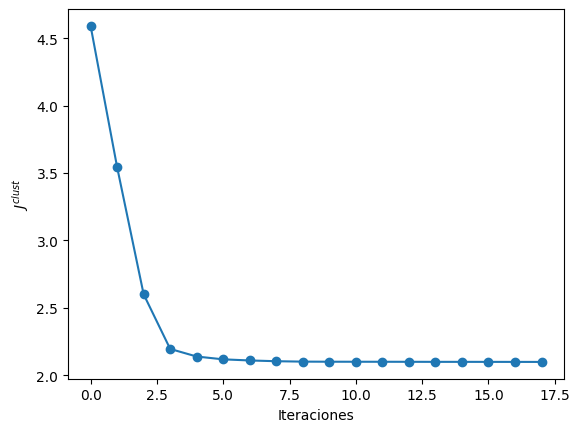

In [368]:
##iteraciones con la misma semilla
for i in range(10):
    clusters, reps, jclust = k_means_fitM(data, Z0)
    groups = [[data[i] for i in range(len(data)) if clusters[i] == j] for j in range(k)]
    for i in range(k):
        plt.scatter([c[0] for c in groups[i]],[c[1] for c in groups[i]])
    for j in range(k):
        plt.scatter(reps[j][0], reps[j][1], marker='x', color='black', s=100)
    plt.show()
    ax = plt.axes()
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel(r"$J^{clust}$")
    plt.plot(jclust, marker='o', )
    plt.show() # mostrar la gráfica generada en cada iteración

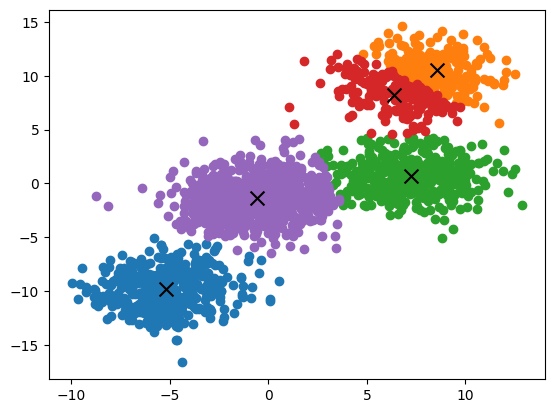

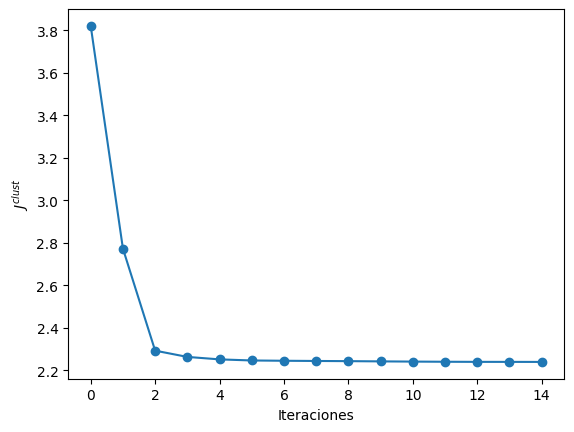

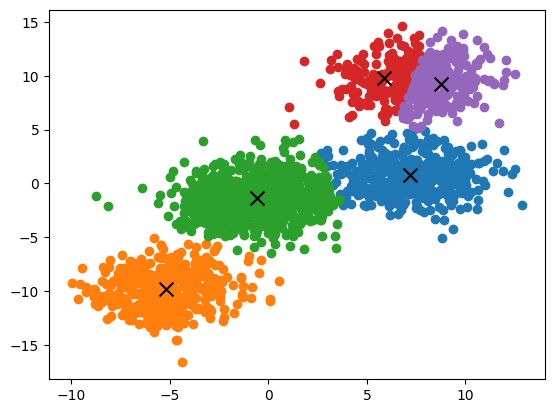

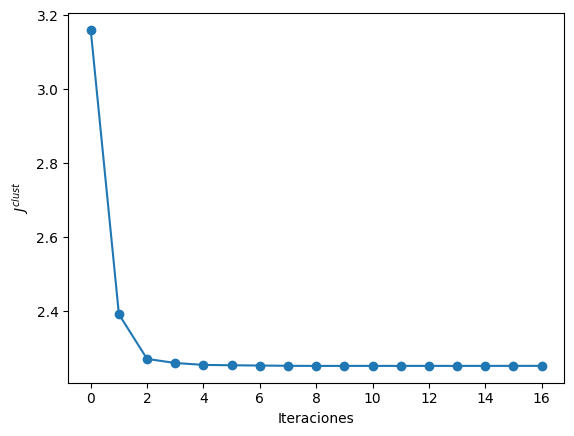

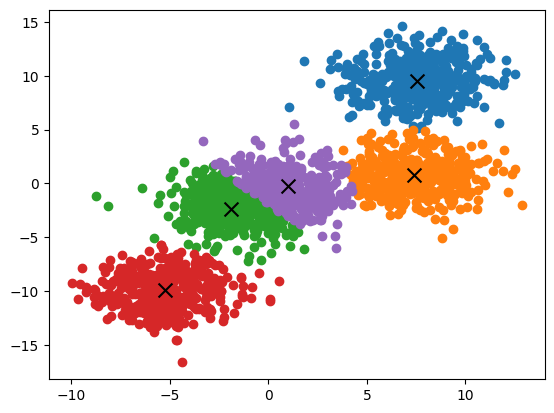

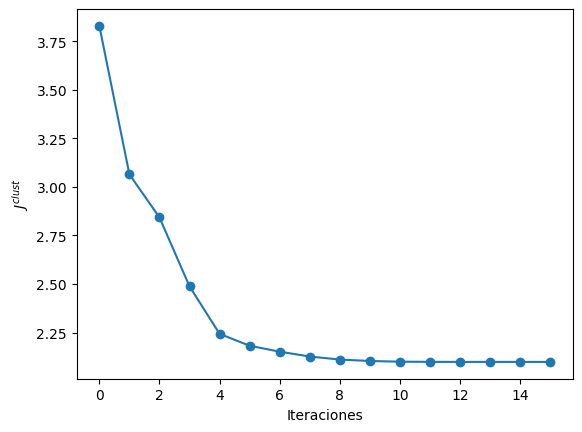

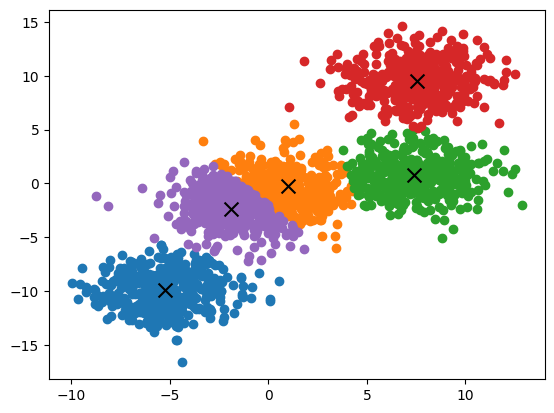

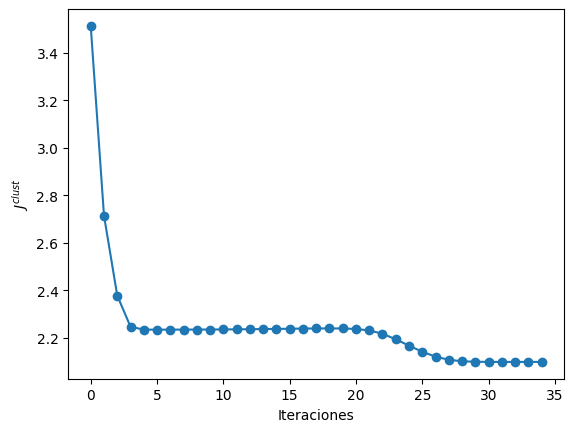

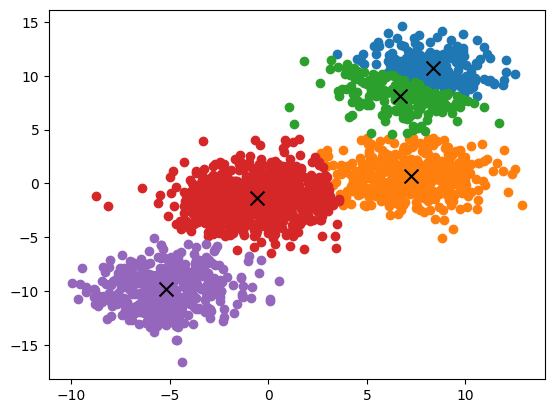

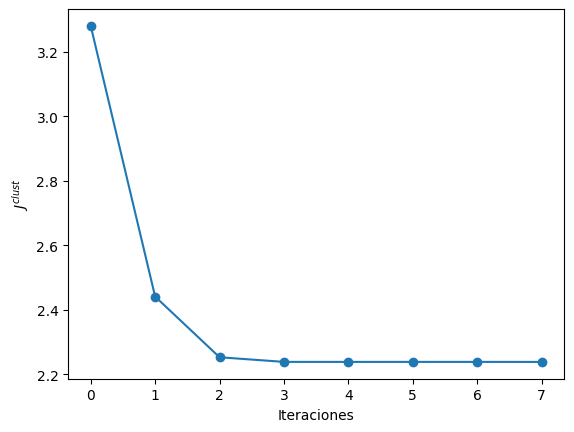

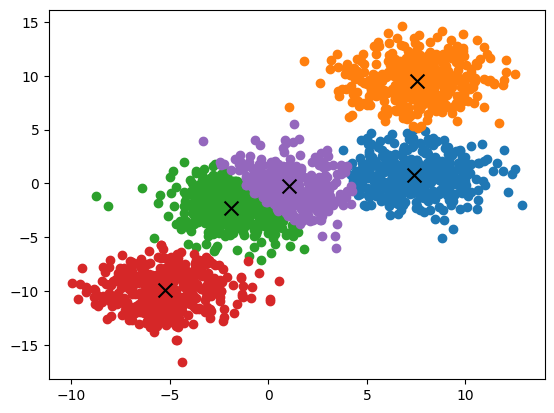

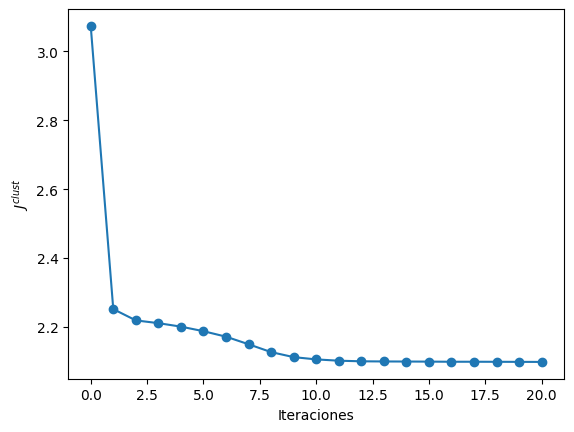

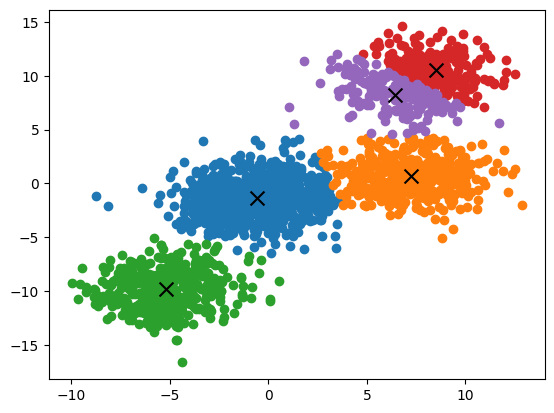

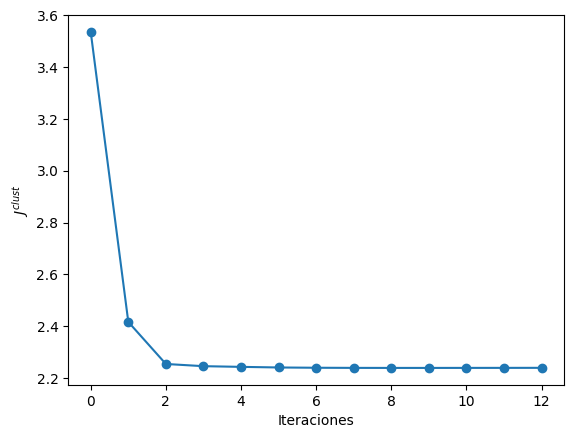

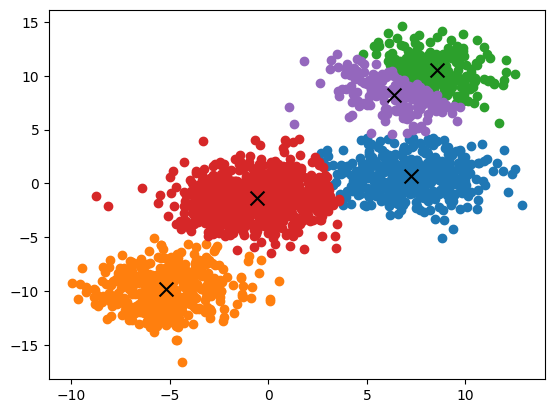

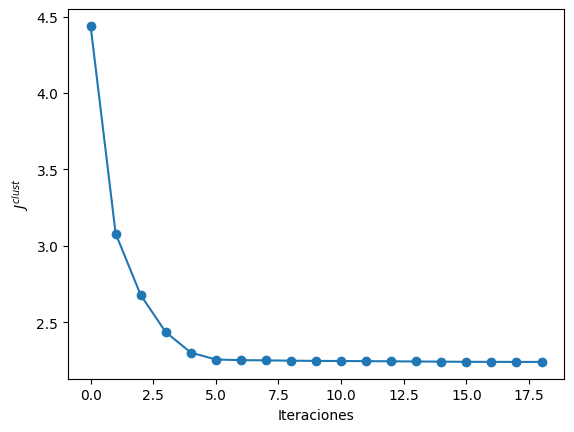

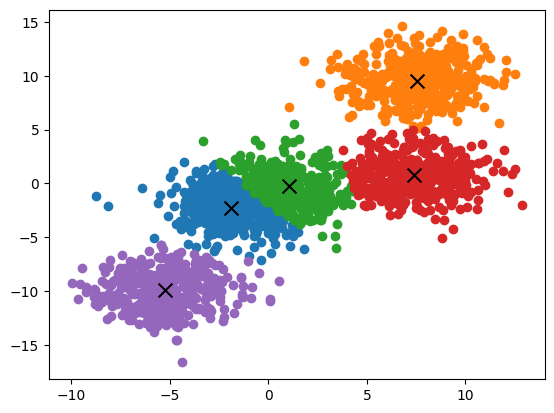

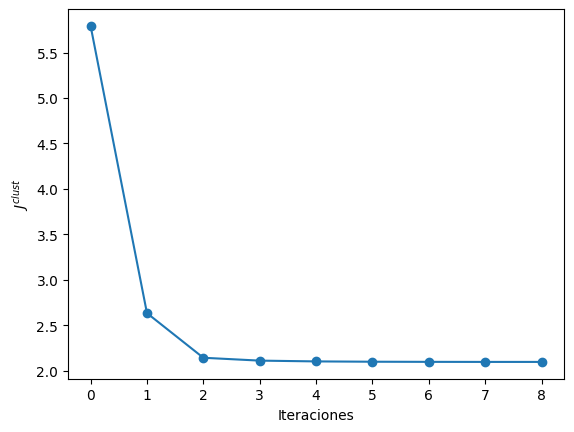

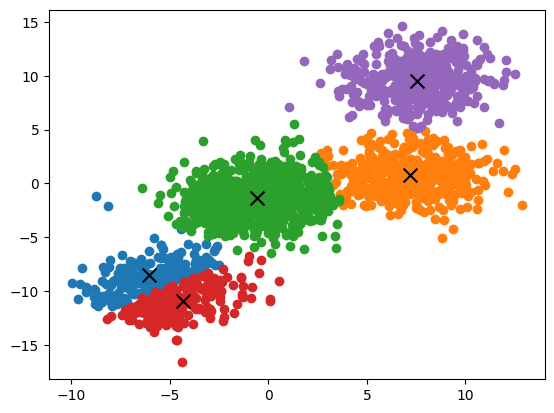

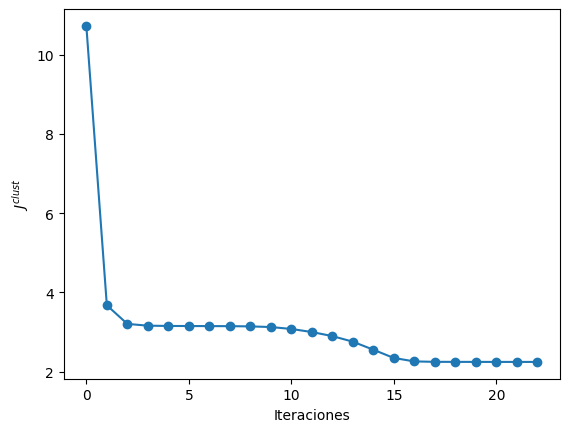

In [372]:
##iteraciones con distinta semilla
for i in range(10):
    ra=ran.randint(1,500)
    Z0=rep_iniciales(5,data,ra) # selección de los datos correspondientes a los índices aleatorios como centroides iniciales
    clusters, reps, jclust = k_means_fitM(data, Z0)
    groups = [[data[i] for i in range(len(data)) if clusters[i] == j] for j in range(k)]
    for i in range(k):
        plt.scatter([c[0] for c in groups[i]],[c[1] for c in groups[i]])
    for j in range(k):
        plt.scatter(reps[j][0], reps[j][1], marker='x', color='black', s=100)
    plt.show()
    ax = plt.axes()
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel(r"$J^{clust}$")
    plt.plot(jclust, marker='o', )
    plt.show() # mostrar la gráfica generada en cada iteración

Pueden observarse diferentes cantidades de iteraciones para el algoritmo en función de la semilla escogida y por ende este depende de los representantes iniciales. En primer lugar, si se define la semilla de forma aleatoria se llega siempre a los mismos clusters y número de iteraciones, es determinístico. En base a esas observaciones realicé 2 iteraciones de 10 experimentos con el algoritmo. En primer lugar realicé iteraciones con la misma semilla, realizando 10 intentos de clusterización, y en segundo lugar, realizando clusterización con 10 semillas diferentes aleatorias.

Para el clustering en el primer caso, de que la semilla se fijara, puedo observar que el máximo de iteraciones para llegar al objetivo de converger fueron 18 iteraciones, pero que con tan solo 5 iteraciones estaba ya muy cercano al valor óptimo.

Para el clustering en el segundo caso, en que la semilla fuera distinta las 10 veces, puedo observar que el máximo de iteraciones para llegar al objetivo de converger fueron 40, pero también uno observa que el número de iteraciones para estar muy cercano al óptimo es menor a 15 y en muchos casos se consigue con una cantidad muy pequeña de iteraciones.

Para estar tranquilos, debería conseguirse llegar a una convergencia en menos de 30 iteraciones.

#### C) Datos de imágenes de MNIST

In [187]:
import idx2numpy
import numpy as np
import cv2
import os
file = 'train-images-idx3-ubyte.idx3-ubyte'
##filepath = os.path.join(os.getcwd(), file)
arr = idx2numpy.convert_from_file(file)
arrnew = [arr_j.flatten() for arr_j in arr]
#print(arrnew[0])
my_array = np.array(arrnew)
print(my_array[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [373]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [374]:
X = x_test
X.shape

(10000, 28, 28)

In [375]:
x_new = X.reshape(*X.shape[:-2], -1)
x_new.shape

(10000, 784)

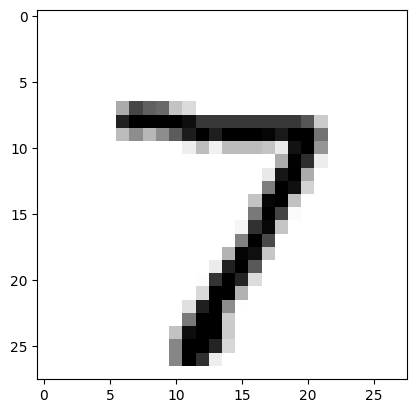

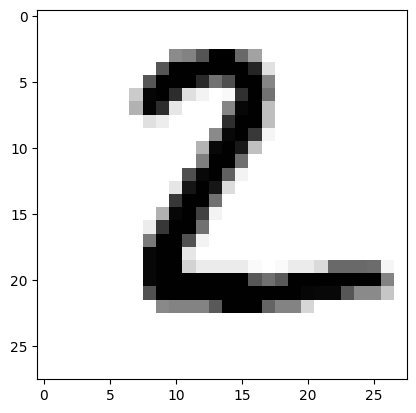

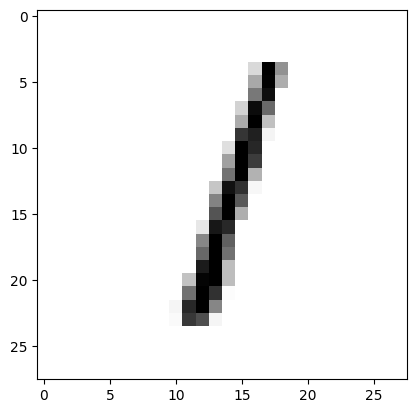

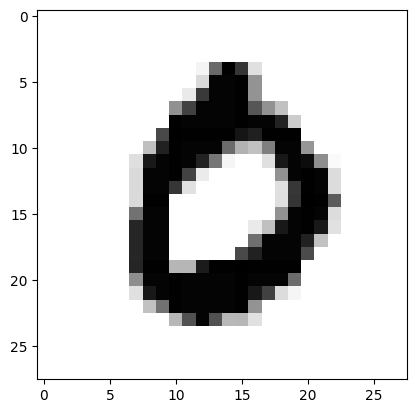

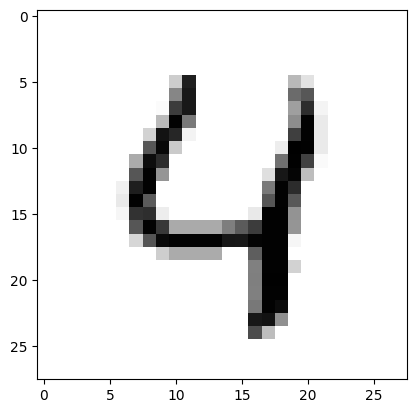

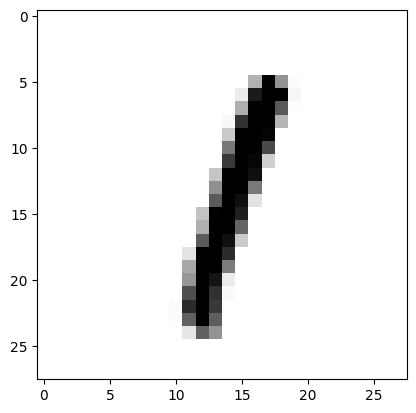

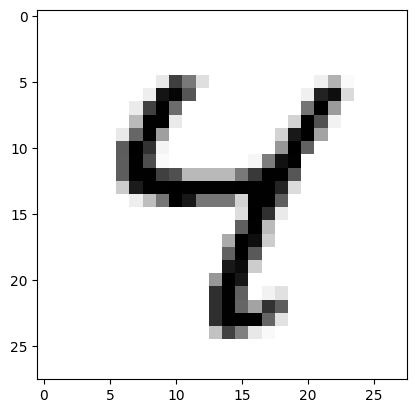

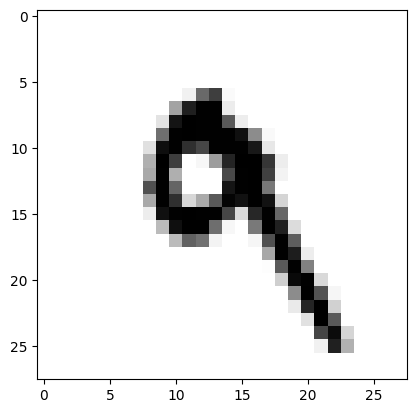

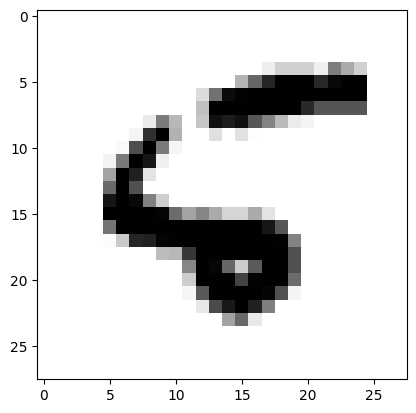

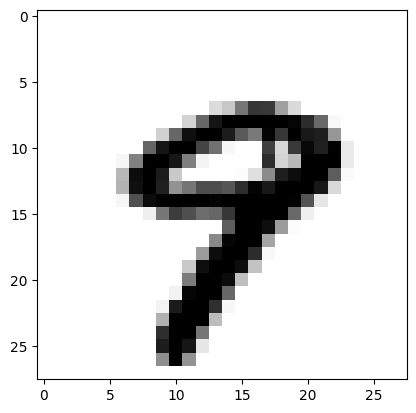

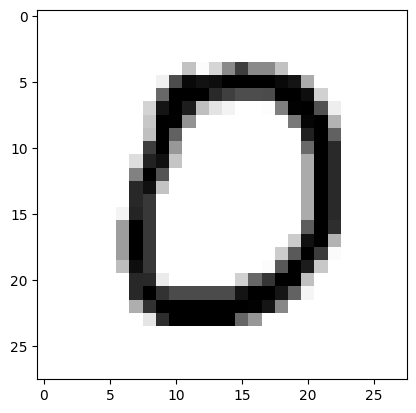

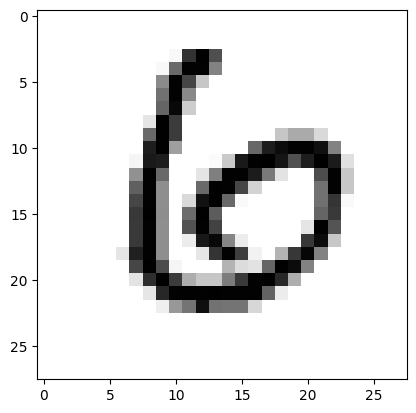

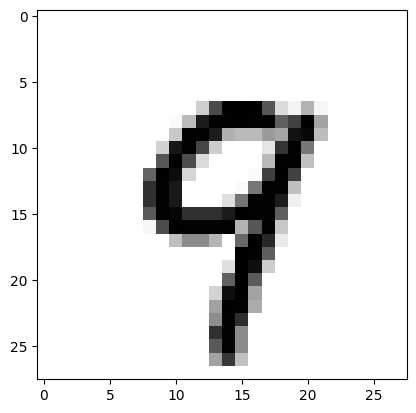

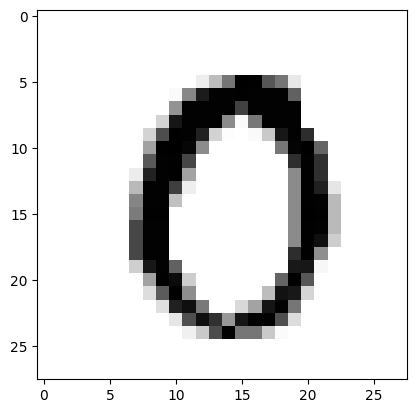

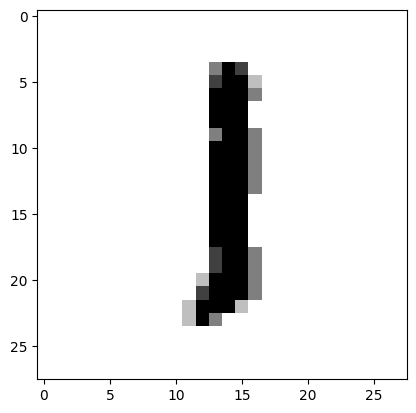

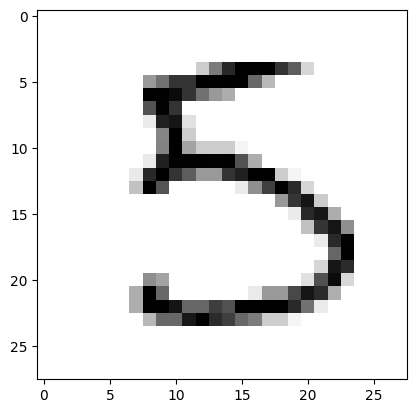

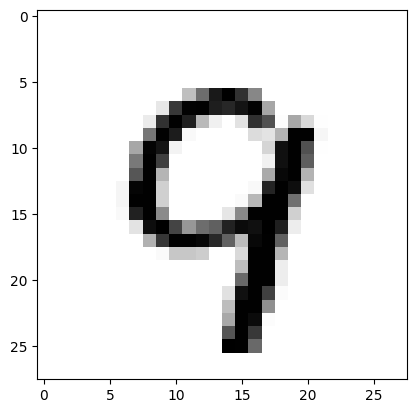

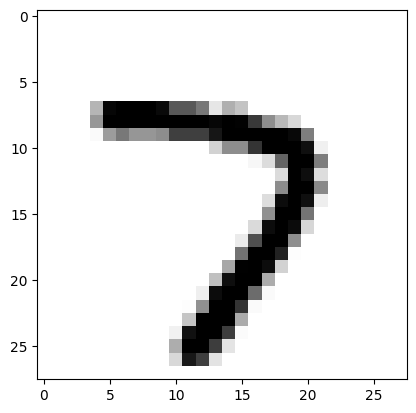

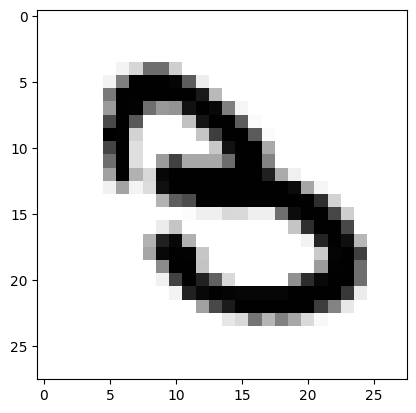

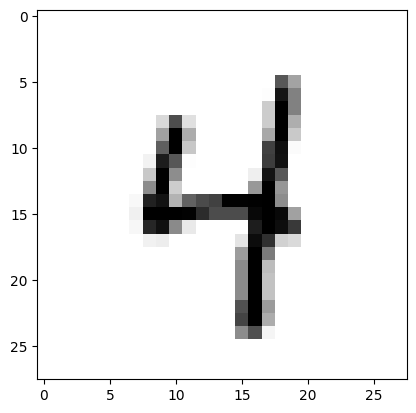

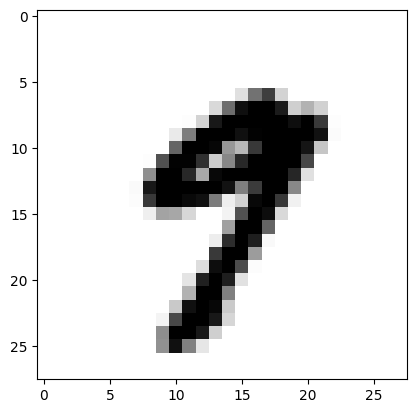

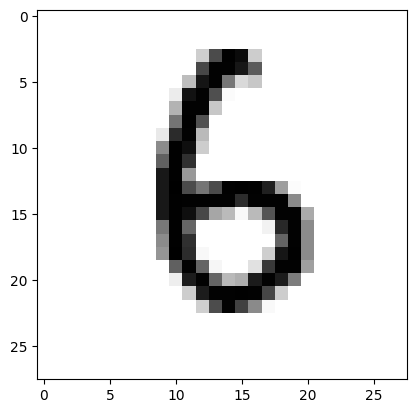

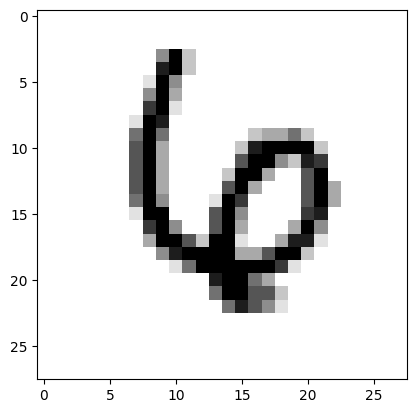

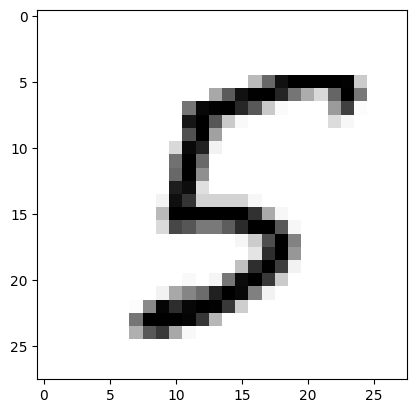

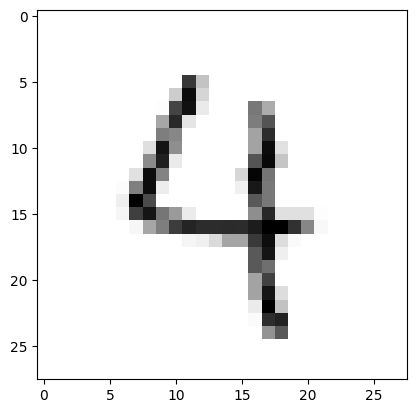

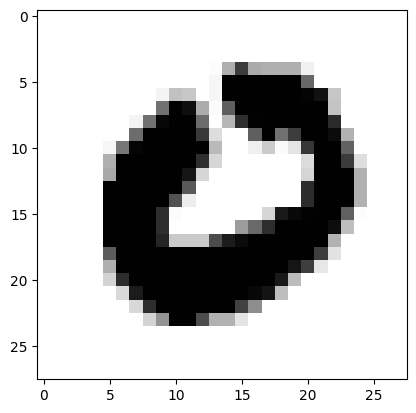

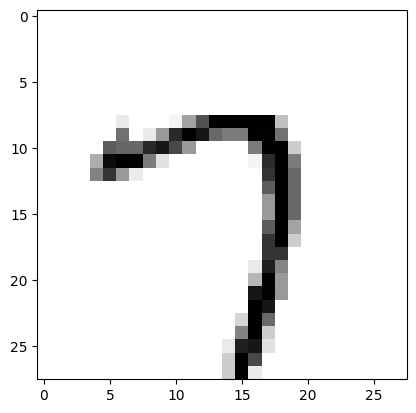

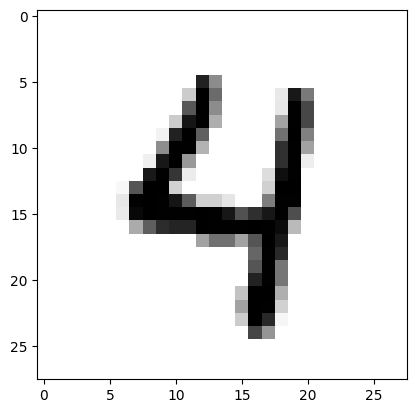

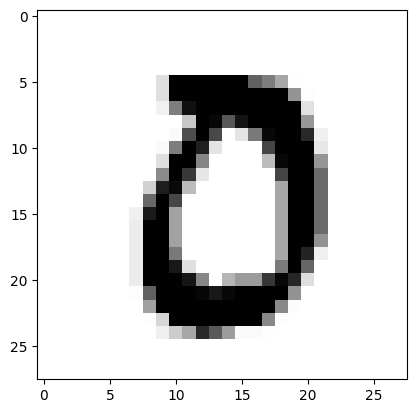

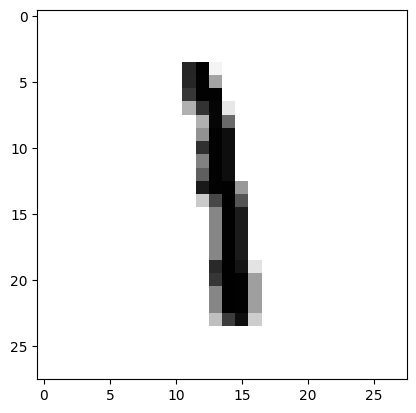

In [376]:
for j in range(30):
    plt.imshow(x_test[j], cmap=plt.cm.binary)
    plt.show()

In [377]:
#cM
k=20
Z0 = rep_iniciales(20, x_new, semilla=25222)
#calcula  
clusters, rep, jclust= k_means_fitM(x_new, Z0, NITERMAX=20)

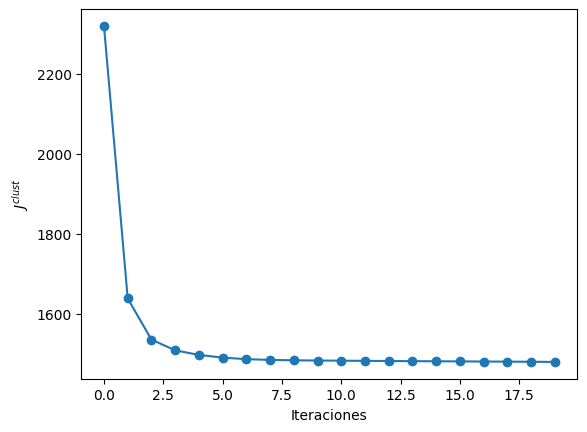

In [378]:
ax = plt.axes()
ax.set_xlabel('Iteraciones')
ax.set_ylabel(r"$J^{clust}$")
plt.plot(jclust, marker='o', )
plt.show()

4


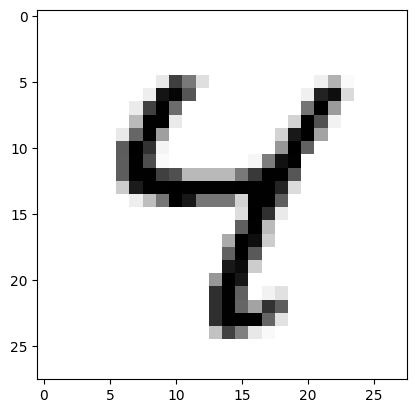

4


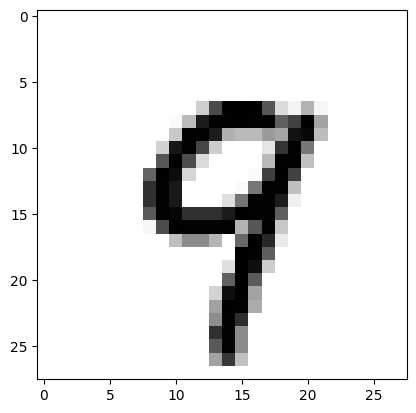

4


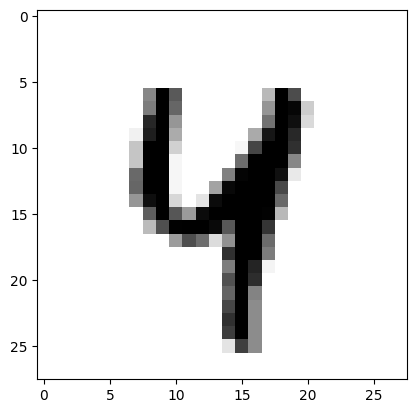

4


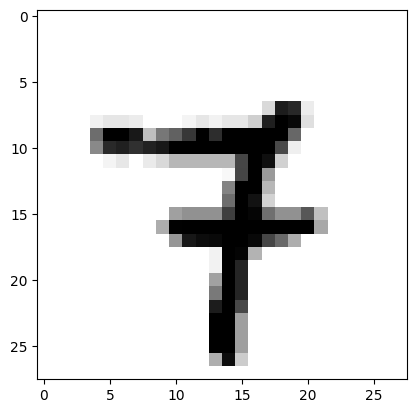

4


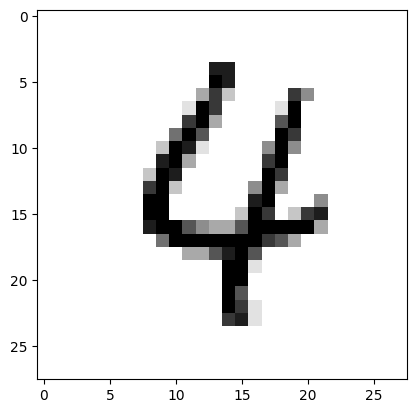

4


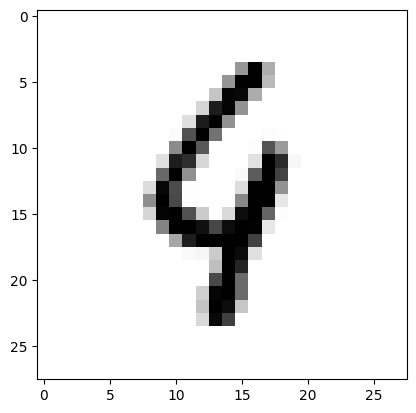

4


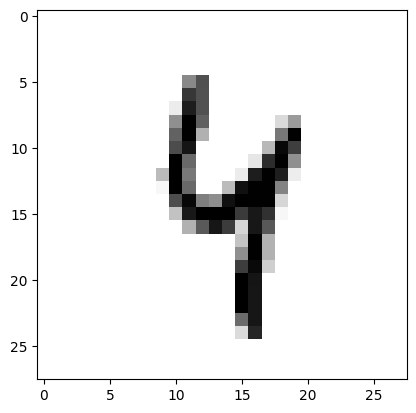

4


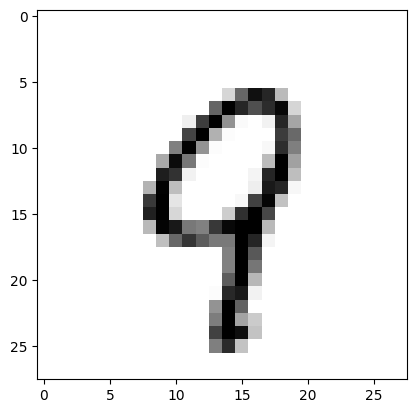

4


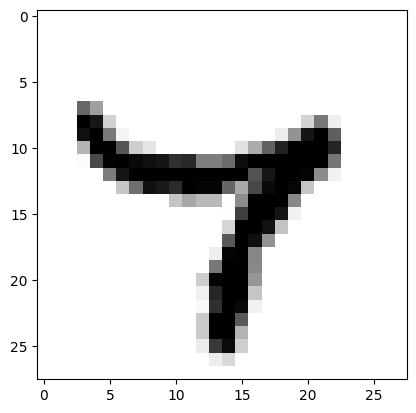

4


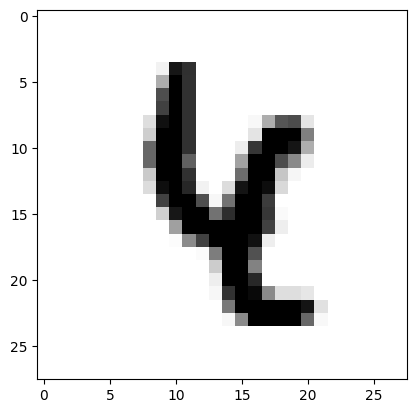

4


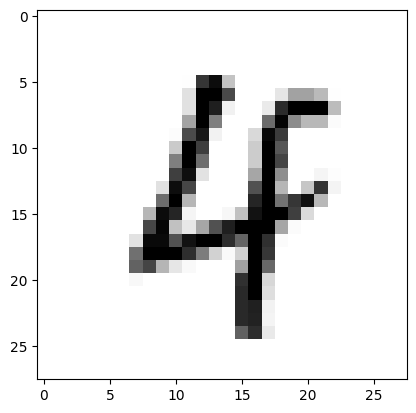

4


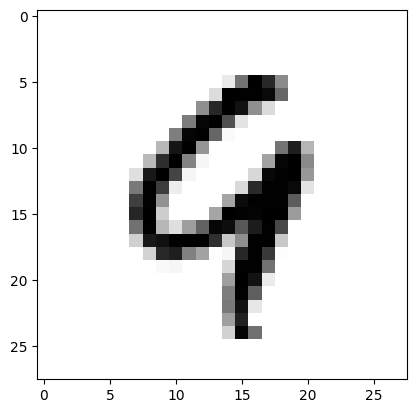

4


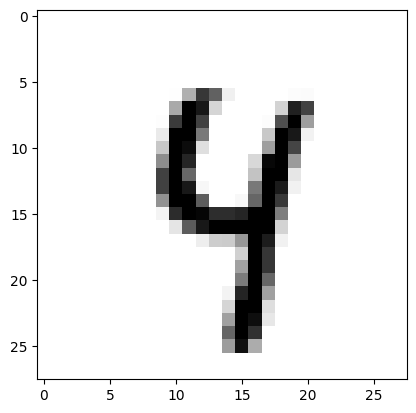

In [379]:
for j in range(200):
    if clusters[j] == 4:
        print(clusters[j])
        plt.imshow(x_test[j], cmap=plt.cm.binary)
        plt.show()

Se puede observar por el gráfico, que el número de iteraciones necesarias para estar cercano al J óptimo no debiera ir mucho más allá de 5 iteraciones. Es decir converge de manera rápida.

#### D) Convergencia de K-means

El algoritmo de K-means converge porque sigue un procedimiento heurístico iterativo en el que se actualizan los centroides de los clusters y se reasignan los puntos a los clusters más cercanos. Cada iteración del algoritmo disminuye la función objetivo, que es la suma de las distancias al cuadrado entre cada punto y su centroide correspondiente.

La convergencia del algoritmo de K-means se garantiza en teoría, siempre que se cumplan ciertas condiciones. En particular, se requiere que la función objetivo sea acotada inferiormente y que se cumpla la condición de que cada punto pertenezca a un único cluster en cada iteración. Si se cumple esta condición, entonces la función objetivo decrece en cada iteración y eventualmente converge a un mínimo local.

Sin embargo, la convergencia del algoritmo de K-means no está garantizada en todos los casos. En particular, el algoritmo puede converger a un mínimo local si los centroides iniciales se eligen de forma incorrecta o si hay puntos extremadamente alejados que pueden ser asignados a un cluster diferente en cada iteración. En estos casos, el algoritmo puede quedar atrapado en un mínimo local y no lograr la solución óptima global, de modo que no convergería.

En resumen, el algoritmo de K-means converge en la mayoría de los casos, siempre y cuando se cumplan ciertas condiciones y los centroides iniciales se elijan de forma adecuada. Sin embargo, en algunos casos puede haber problemas de convergencia, por lo que es importante tener en cuenta estos factores al aplicar el algoritmo. Por ejemplo, esto me pasó al elegir aleatoriamente los centroides analizando la base de datos MNIST, cuando en realidad era mucho mejor elegir los centroides iniciales como parte de los vectores de la base de datos.

### Pregunta 3: Independencia Lineal

Al ser $A$ una matriz sobredeterminada ($m>n$), la única forma de que el sistema $Ax=b$ tenga solución es que exista una inversa por izquierda para la matriz $A$ (matriz $C$), de modo que $Cb=C(Ax)=(CA)x=Ix=x$. Esta matriz inversa por la izquierda de $A$ existe sí y solo si las columnas de $A$ son linealmente independientes (Toda esta argumentación sale indicada de manera textual en la página 200 del libro guía del curso). Por lo tanto, $\textbf{la forma más práctica para saber si tiene solución el sistema es si las columnas de $A$ son linealmente independientes}$, si es así el sistema tiene solución, de modo contrario, el sistema $Ax=b$ no la tiene.

### Pregunta 4: Perceptrón


#### a,d) Rutina y uso de bases de datos1 y datos2

In [74]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [169]:
datos1 = pd.read_csv('data1.csv', delimiter=',', index_col=0)

In [162]:
datos1

,x,y,label
0,-2.6,-0.1,0
1,0.5,-4.8,1
2,3.0,3.4,1
3,-2.6,0.6,0
4,2.1,-1.3,1
...,...,...,...
95,-1.0,-3.8,0
96,0.7,1.5,1
97,-2.0,4.6,0
98,-2.6,-0.1,0


In [78]:
datos2 = pd.read_csv('data2.csv', delimiter=',', index_col=0)

In [79]:
datos2

,x,y,label
0,-2.6,-0.1,0
1,0.5,-4.8,0
2,3.0,3.4,0
3,-2.6,0.6,1
4,2.1,-1.3,1
...,...,...,...
95,-1.0,-3.8,0
96,0.7,1.5,1
97,-2.0,4.6,1
98,-2.6,-0.1,0


In [166]:
X1 = np.array(datos1[['x', 'y']])
label1 = np.array(datos1[['label']])
X2 = np.array(datos2[['x', 'y']])
label2 = np.array(datos2[['label']])

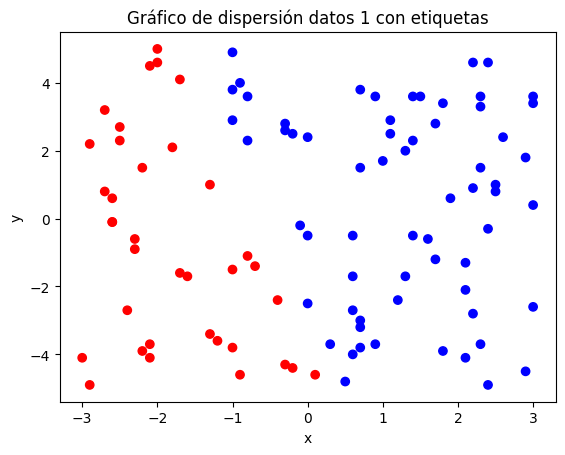

In [460]:
# extrae las columnas x, y, y label
x = X1[:, 0]
y = X1[:, 1]
label = datos1['label']

# crea un diccionario de colores para cada etiqueta
colores = {0: 'red', 1: 'blue'}

# crea un gráfico de dispersión con diferentes colores para cada etiqueta
plt.scatter(x, y, c=label.apply(lambda x: colores[x]))

# agrega etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dispersión datos 1 con etiquetas')

# muestra el gráfico
plt.show()


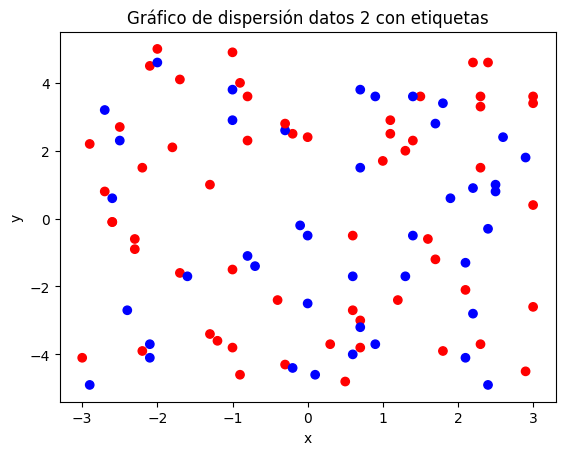

In [461]:
# extrae las columnas x, y, y label
x = X2[:, 0]
y = X2[:, 1]
label = datos2['label']

# crea un diccionario de colores para cada etiqueta
colores = {0: 'red', 1: 'blue'}

# crea un gráfico de dispersión con diferentes colores para cada etiqueta
plt.scatter(x, y, c=label.apply(lambda x: colores[x]))

# agrega etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de dispersión datos 2 con etiquetas')

# muestra el gráfico
plt.show()

In [464]:
X_train, X_test, label_train, label_test = train_test_split(X1, label1, test_size=0.2, random_state=123)

In [534]:
X_train2, X_test2, label_train2, label_test2 = train_test_split(X2, label2, test_size=0.2, random_state=123)

In [116]:
X_train

array([[-0.1, -0.2],
       [-1.6, -1.7],
       [ 2.9,  1.8],
       [ 2.3,  3.6],
       [-2.4, -2.7],
       [-0.7, -1.4],
       [-0.2, -4.4],
       [ 0.7, -3. ],
       [ 2.4, -4.9],
       [ 1.5,  3.6],
       [ 1.3, -1.7],
       [ 0.3, -3.7],
       [ 0. ,  2.4],
       [ 2.5,  0.8],
       [-1.8,  2.1],
       [-3. , -4.1],
       [-1. , -3.8],
       [-2. ,  4.6],
       [-0.8,  3.6],
       [ 3. ,  3.6],
       [-2.3, -0.6],
       [-0.9,  4. ],
       [ 0. , -0.5],
       [ 2.1, -2.1],
       [ 0.5, -4.8],
       [ 1.4,  2.3],
       [ 2.9, -4.5],
       [-0.9, -4.6],
       [ 0. , -2.5],
       [ 2.3,  1.5],
       [-2.2, -3.9],
       [-0.3, -4.3],
       [ 1.7,  2.8],
       [ 1. ,  1.7],
       [ 3. , -2.6],
       [-2.6, -0.1],
       [ 1.9,  0.6],
       [ 0.1, -4.6],
       [ 1.8, -3.9],
       [ 2.4,  4.6],
       [-0.8,  2.3],
       [-1.2, -3.6],
       [ 3. ,  0.4],
       [ 1.3,  2. ],
       [-1.3, -3.4],
       [ 1.6, -0.6],
       [ 1.1,  2.5],
       [-1. ,

In [117]:
X_test

array([[ 2.2, -2.8],
       [ 0.9, -3.7],
       [ 1.2, -2.4],
       [-2.3, -0.9],
       [-2. ,  5. ],
       [-2.6, -0.1],
       [-0.8, -1.1],
       [ 2.2,  0.9],
       [ 1.4, -0.5],
       [ 2.1, -1.3],
       [ 1.7, -1.2],
       [ 0.6, -1.7],
       [-2.1,  4.5],
       [-0.2,  2.5],
       [-2.5,  2.3],
       [-1. ,  4.9],
       [ 2.5,  1. ],
       [-1. ,  2.9],
       [ 0.7, -3.2],
       [-2.5,  2.7]])

In [118]:
label_test

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [607]:
#clase1
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

Perceptron classification accuracy 0.545


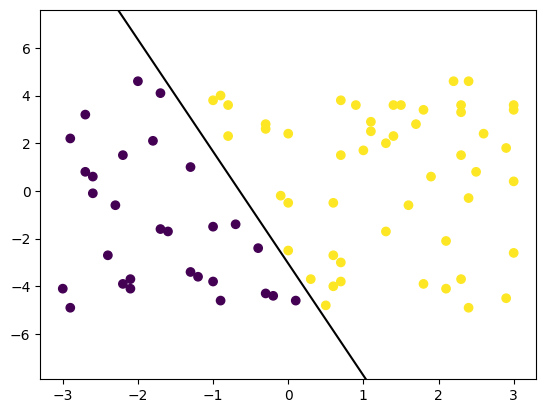

In [611]:
# Testing1
if __name__ == "__main__":
   
    def accuracy(y_true, y_pred):
        accuracy = np.mean(y_true == y_pred)
        return accuracy

    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, label_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(label_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=label_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

Para este conjunto de datos el algoritmo funciona perfecto separando linealmente los conjuntos, ya que estos son linealmente separables

Perceptron classification accuracy 0.485


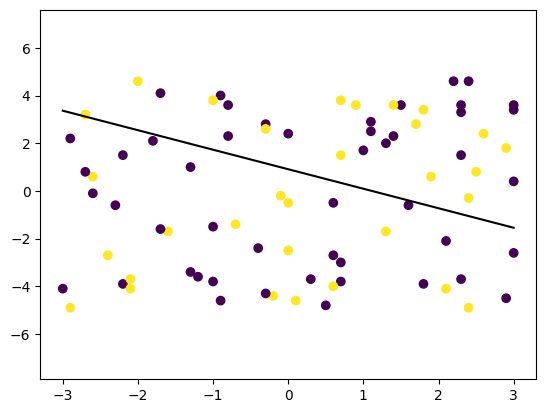

In [614]:
if __name__ == "__main__":
   
    def accuracy(y_true, y_pred):
        accuracy = np.mean(y_true == y_pred)
        return accuracy

    q = Perceptron(learning_rate=0.01, n_iters=1000)
    q.fit(X_train2, label_train2)
    predictions = q.predict(X_test2)

    print("Perceptron classification accuracy", accuracy(label_test2, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train2[:, 0], X_train2[:, 1], marker="o", c=label_train2)

    x0_1 = np.amin(X_train2[:, 0])
    x0_2 = np.amax(X_train2[:, 0])

    x1_1 = (-q.weights[0] * x0_1 - q.bias) / q.weights[1]
    x1_2 = (-q.weights[0] * x0_2 - q.bias) / q.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train2[:, 1])
    ymax = np.amax(X_train2[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

Para este set de datos el algoritmo no funciona bien, pues no puede clasificar linealmente grupos dispersos entre sí

#### b) Programe una rutina que dado un vector de pesos w, y un conjunto de datos X prediga en a que conjunto de datos pertenece cada dato:

In [595]:
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

class Perceptron_input_pesos:

    def __init__(self, weights, bias=0):
        self.weights = weights
        self.bias = bias
        self.activation_func = unit_step_func

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

#### c) Programe una rutina que dado un vector de pesos w, un conjunto de datos X y sus etiquetas y entregue un score de que tan bien clasificados están los datos según las predicciones hechas por el clasificador

In [594]:
def score(w, X, y):
    n_samples = X.shape[0]
    y_predicted = unit_step_func(np.dot(X, w))
    accuracy = np.sum(y_predicted == y) / n_samples
    return accuracy

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

#### e) 10 nuevos datos

Perceptron classification accuracy 0.6


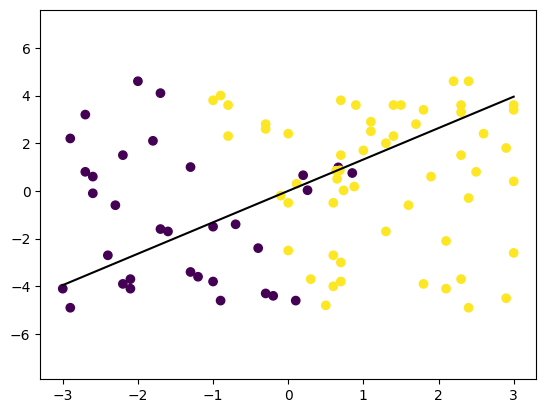

In [617]:
np.random.seed(18)
new_data = np.random.random(size = (10, 2))
new_data_labels = np.random.randint(2, size = 10)
if __name__ == "__main__":
   
    def accuracy(y_true, y_pred):
        accuracy = np.mean(y_true == y_pred)
        return accuracy

    r = Perceptron(learning_rate=0.01, n_iters=1000)
    r.fit(new_data, new_data_labels)
    predictions = r.predict(new_data)

    print("Perceptron classification accuracy", accuracy(new_data_labels, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=label_train)
    plt.scatter(new_data[:, 0], new_data[:, 1], marker="o", c=new_data_labels)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-r.weights[0] * x0_1 - r.bias) / r.weights[1]
    x1_2 = (-r.weights[0] * x0_2 - r.bias) / r.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()

los datos aleatorios no logran clasificarse bien, pues se colocan en regiones donde no puede siempre separarse en 2 conjuntos lamentablemente, así que tampoco sirve el algoritmo en este caso.

### Pregunta 5: Descomposición en valores singulares

Siendo $A \in R^{m,n}$ con valores singulares $\sigma_{1,...,p}$ Tenemos por definición que $|Av_i|=\sigma_i$ (vector singular y valor singular). El vector $Av_i$ es realmente una lista de longitudes (con signos) de las proyecciones de $A$ sobre $v_i$. Pensemos $\sigma_i$ como la "componente" de la matriz $A$ a lo largo de $v_i$. Para que esta interpretación tenga sentido, debiera ser verdad que sumar los cuadrados de los componentes de $A$ a lo largo de cada uno de los $v_i$ nos debiera dar el cuadrado del "contenido completo de la matriz $A$". Esto es de hecho cierto y es la analogía matricial de descomponer un vector en sus componentes a lo largo de direcciones ortogonales.

Consideremos una fila, digamos $a_j$, de $A$. Ya que $v_1,v_2,...,v_p$ generan el espacio de todas las filas de $A$ (son vectores ortonormales), entonces $a_j \cdot v=0$ para todos los $v$ perpendiculares a $v_1,v_2,...,v_p$. Así, para cada fila $a_j$, $\sum_{i=1}^{p} (a_j \cdot v_i)^2= |a_j|^2$. 

Sumando sobre todas las fijas $j$ de A,

$\sum_{j=1}^{m} |a_j|^2= \sum_{j=1}^{m}\sum_{i=1}^{p} (a_j \cdot v_i)^2 = \sum_{i=1}^{p}\sum_{j=1}^{m} (a_j \cdot v_i)^2= \sum_{i=1}^{p}|Av_i|^2= \sum_{i=1}^{p}\sigma_i^2$

Por otro lado, además, se tiene que $\sum_{j=1}^{m} |a_j|^2= \sum_{j=1}^{m}\sum_{k=1}^{n} (a_{jk})^2 $, lo que es igual a la suma de los cuadrados de todas las entradas de $A$. Así, la suma de los cuadrados de los valores singulares de $A$ es de hecho el cuadrado del "contenido completo de la matriz $A$", esto es equivalente por definición a la norma de Frobenius, pues $||A||_F$ se define como:

$||A||_F= \sqrt{\sum_{j=1}^{m}\sum_{k=1}^{n} (a_{jk})^2}$

Queda por tanto demostrado que $\textbf{la norma de Frobenius es equivalente a la raíz de la suma de los valores singulares}$ de $A$.

$\sqrt{\sum_{i=1}^{p}\sigma_i^2}=||A||_F$


### Pregunta 6: Análisis de componentes principales (PCA)


#### a) Descomposición en valores singulares

In [182]:
from keras.datasets import mnist
import numpy as np
from numpy.linalg import svd
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [381]:
X = x_test
X.shape

(10000, 28, 28)

In [382]:
x_new = X.reshape(*X.shape[:-2], -1)
x_new.shape

(10000, 784)

In [383]:
U,S,VT= np.linalg.svd(x_new,full_matrices=0)

In [384]:
U

array([[ 6.69131032e-03, -4.43905472e-03,  1.35169440e-02, ...,
         0.00000000e+00,  9.82474718e-01,  0.00000000e+00],
       [ 8.50156910e-03,  2.49999658e-03, -1.94125838e-02, ...,
         0.00000000e+00,  3.81516183e-04,  1.80007358e-03],
       [ 4.10590493e-03, -1.02370582e-02, -8.96155778e-03, ...,
         0.00000000e+00, -2.69587617e-03, -1.30658138e-02],
       ...,
       [ 1.20272256e-02, -1.26778775e-02,  1.12118704e-02, ...,
         2.76837123e-04,  3.71551180e-04,  1.19656306e-03],
       [ 9.45146362e-03, -6.75106532e-03, -2.91656094e-03, ...,
        -6.90230750e-04, -3.28404873e-04,  1.59610718e-03],
       [ 1.38735970e-02,  1.72612242e-02, -7.59697248e-04, ...,
        -8.62644831e-05, -3.85930135e-04,  1.97374082e-03]])

In [386]:
U.shape

(10000, 784)

In [414]:
S

array([1.60555132e+05, 5.41904045e+04, 5.09159645e+04, 4.58936283e+04,
       4.27696927e+04, 3.82185587e+04, 3.54137980e+04, 3.19932031e+04,
       3.11946486e+04, 2.80916512e+04, 2.73642619e+04, 2.69398448e+04,
       2.43536341e+04, 2.41213408e+04, 2.34343985e+04, 2.26870936e+04,
       2.16468254e+04, 2.09604364e+04, 2.01617243e+04, 1.98673533e+04,
       1.91489380e+04, 1.87905650e+04, 1.83538194e+04, 1.76046641e+04,
       1.74828392e+04, 1.68687917e+04, 1.65860218e+04, 1.62242953e+04,
       1.57046575e+04, 1.53680960e+04, 1.49371811e+04, 1.46851250e+04,
       1.42669949e+04, 1.41815676e+04, 1.36858745e+04, 1.36558446e+04,
       1.32077349e+04, 1.28583068e+04, 1.25895511e+04, 1.24637530e+04,
       1.22586273e+04, 1.20994895e+04, 1.19355474e+04, 1.15749116e+04,
       1.14077227e+04, 1.12910801e+04, 1.11022090e+04, 1.06781003e+04,
       1.06093712e+04, 1.03940134e+04, 1.02715525e+04, 1.01173286e+04,
       9.95714175e+03, 9.78701935e+03, 9.71086609e+03, 9.52526928e+03,
      

In [415]:
S.shape

(784,)

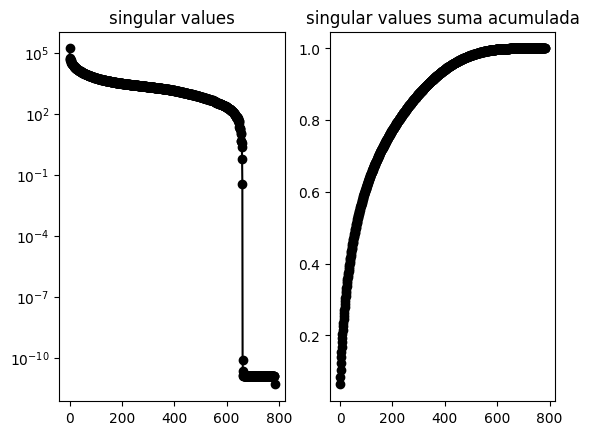

In [416]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
plt.title('singular values')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
plt.title('singular values suma acumulada')
plt.show()

In [417]:
S=np.diag(S)

#### b) reducción de dimensionalidad por PCA

Para reducir la dimensión de los datos a la mitad, es necesario eliminar la mitad de los valores singulares de la matriz S que han sido ordenados de mayor a menor. Esto es equivalente a considerar para la reducción las primeras 392 columnas de U, los primeros 392 elementos de la diagonal de S y las primeras 392 filas de VT.

In [459]:
S[:392,:392].shape

(392, 392)

In [420]:
reduc = U[:, :392]@S[:392,:392]@VT[:392, :]

In [422]:
reduc.shape

(10000, 784)

In [427]:
reduc

array([[ 3.40296056e-13, -1.06479607e-12,  1.74050449e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.50435411e-14,  3.12119530e-14,  1.72130559e-12, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.06316860e-15,  3.12046359e-13, -2.98857893e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 2.74487903e-15, -4.20741406e-13, -6.33624737e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.13817656e-14, -5.39562572e-13,  3.54349559e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.47320961e-15,  8.91295858e-14, -6.30583826e-13, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [454]:
np.linalg.matrix_rank(x_new)

661

In [453]:
np.linalg.matrix_rank(reduc)

392

In [457]:
Uk=np.matrix(U[:, :392])

In [458]:
Uk.shape

(10000, 392)

#### c) 10 Imágenes y sus respectivas proyecciones

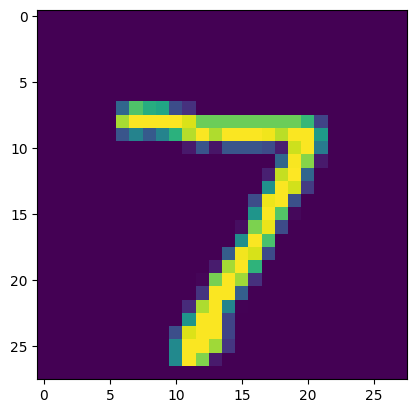

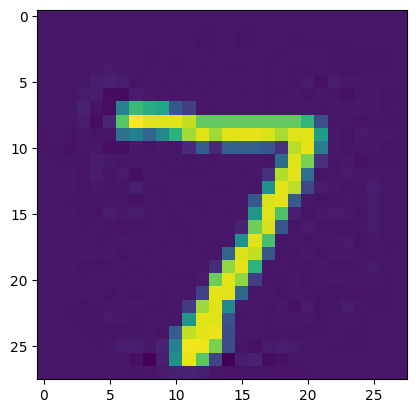

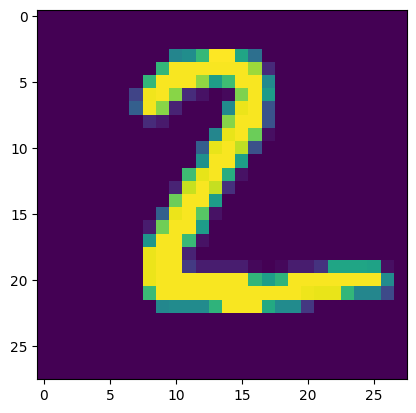

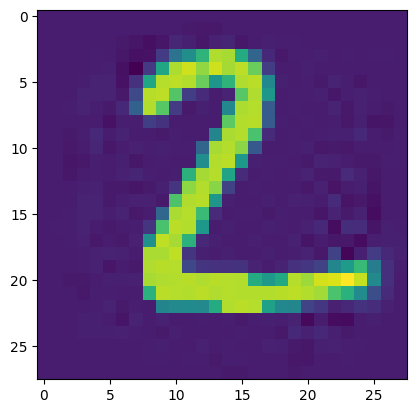

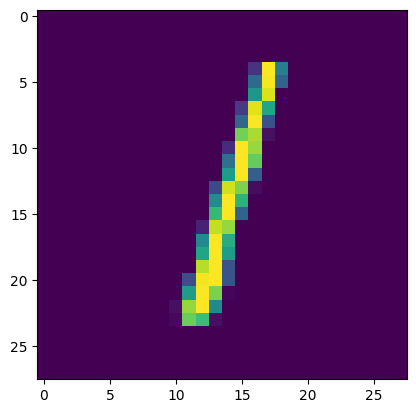

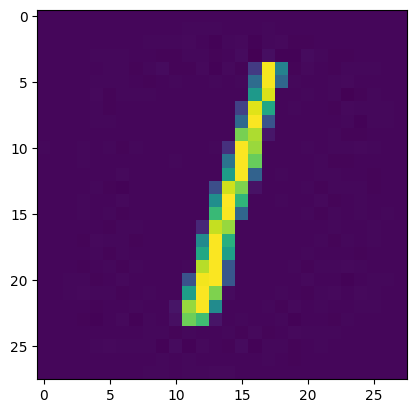

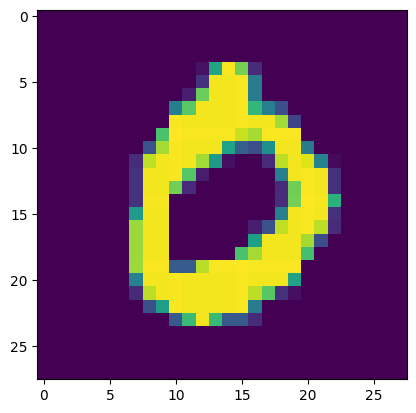

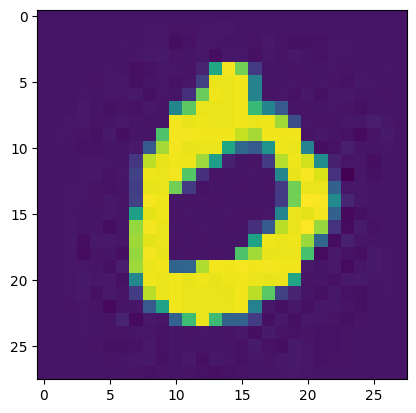

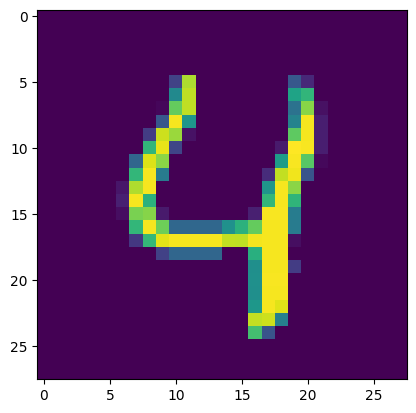

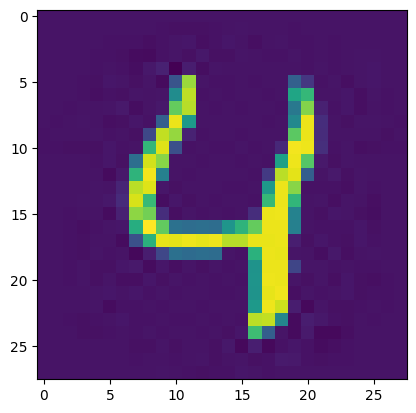

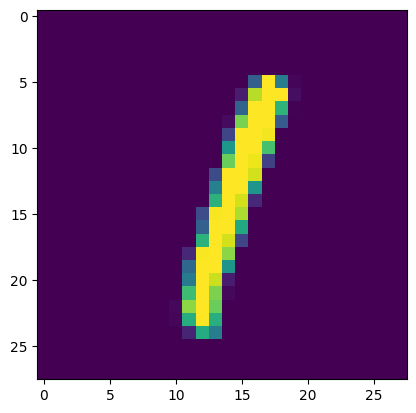

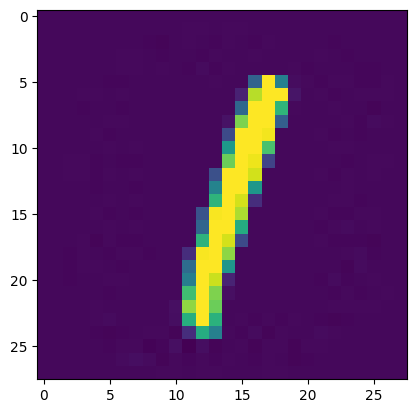

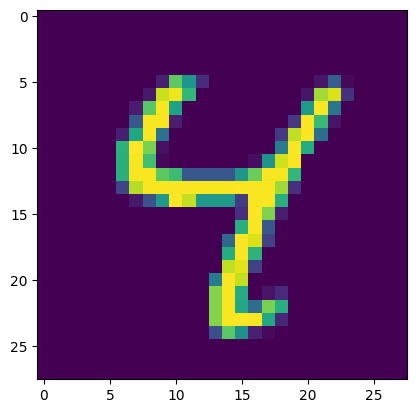

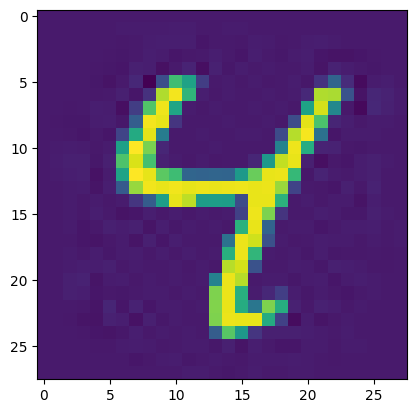

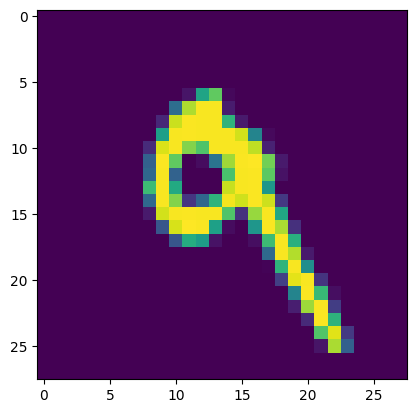

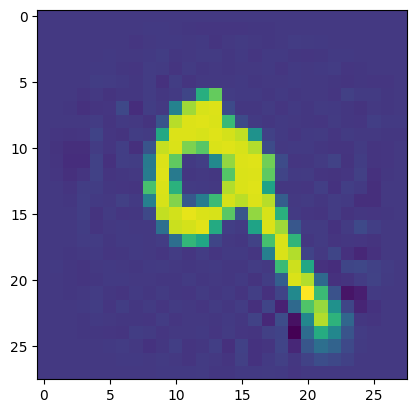

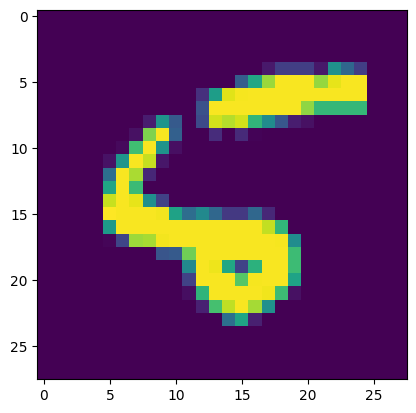

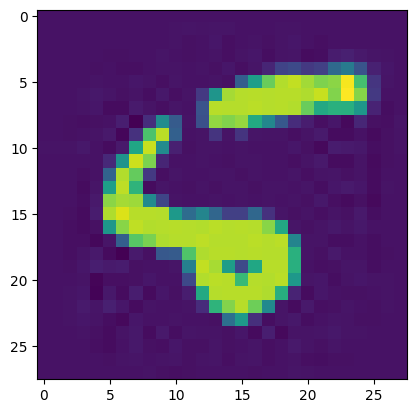

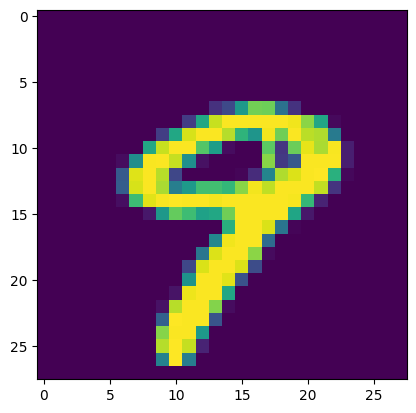

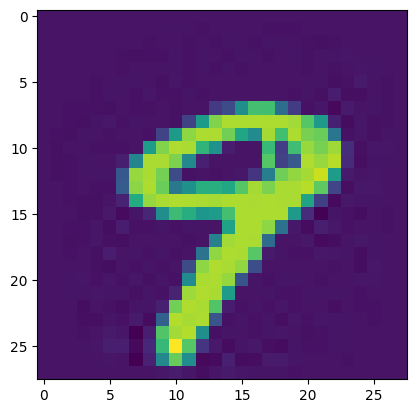

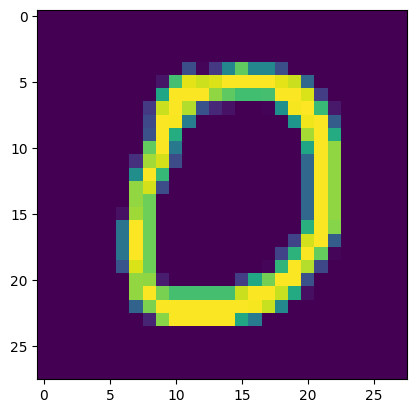

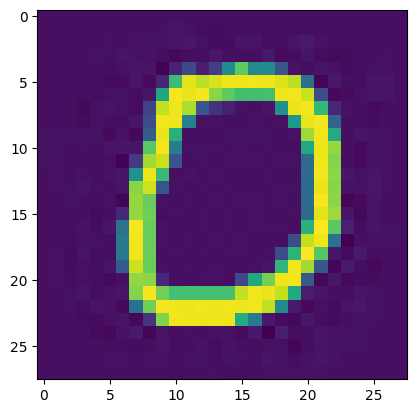

In [448]:
for i in range(11):
    imgk=plt.imshow(x_new[i].reshape(28,28))
    #imgk.set_cmap('gray')
    plt.show()
    imgk=plt.imshow(reduc[i].reshape(28,28))
    #imgk.set_cmap('gray')
    plt.show()

#### d) Clustering de datos proyectados

In [449]:
k=20
Z0 = rep_iniciales(20, reduc, semilla=25222)
#calcula  
clusters, rep, jclust= k_means_fitM(reduc, Z0, NITERMAX=20)

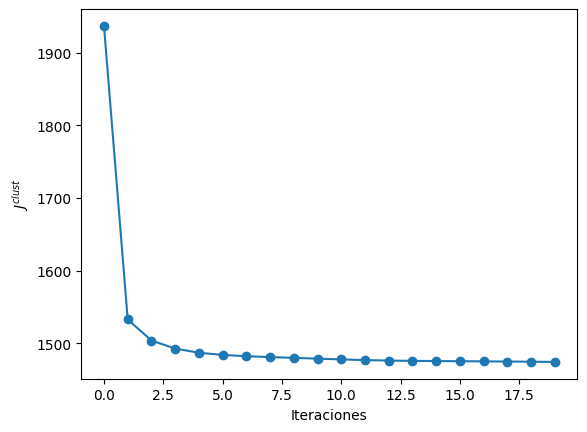

In [450]:
ax = plt.axes()
ax.set_xlabel('Iteraciones')
ax.set_ylabel(r"$J^{clust}$")
plt.plot(jclust, marker='o', )
plt.show()

4


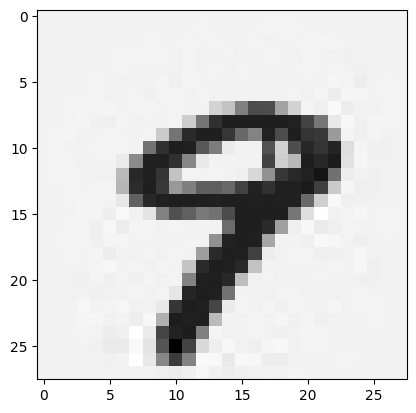

4


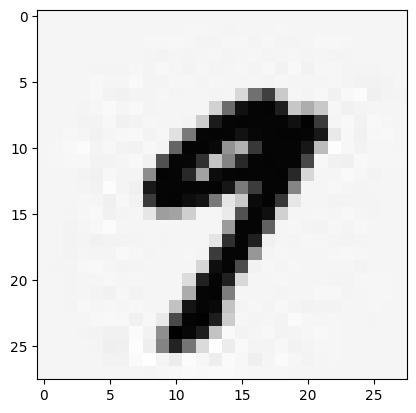

4


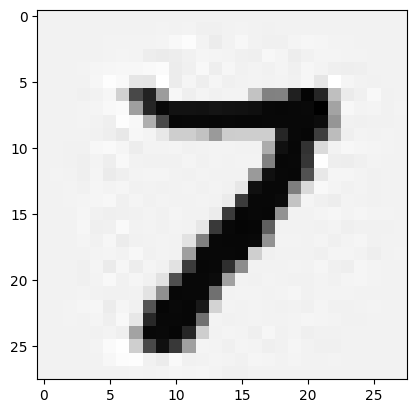

4


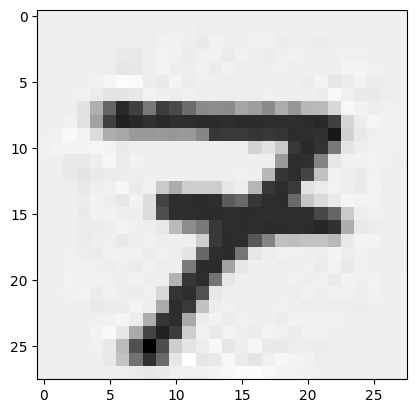

4


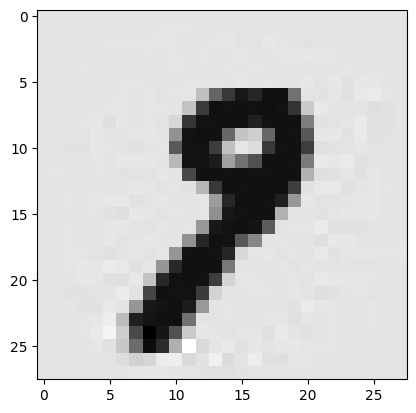

4


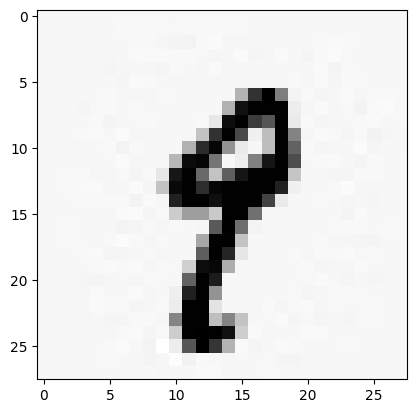

4


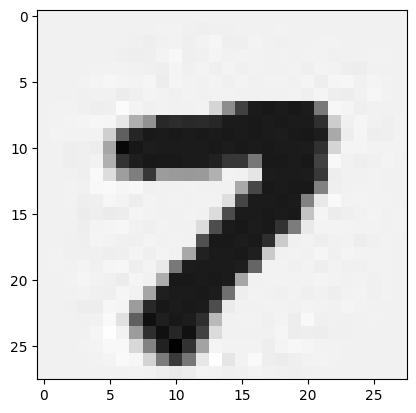

4


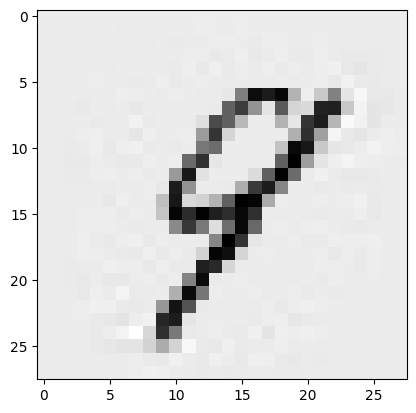

4


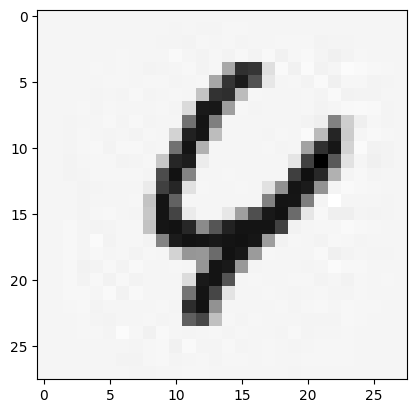

4


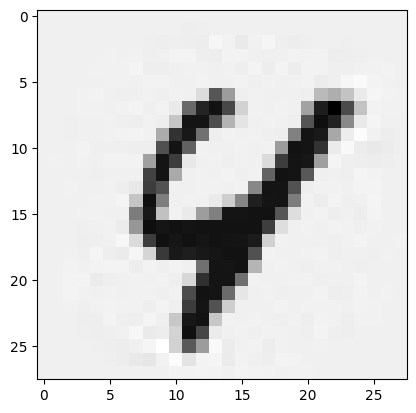

4


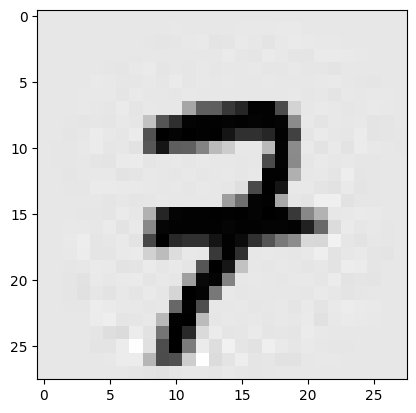

4


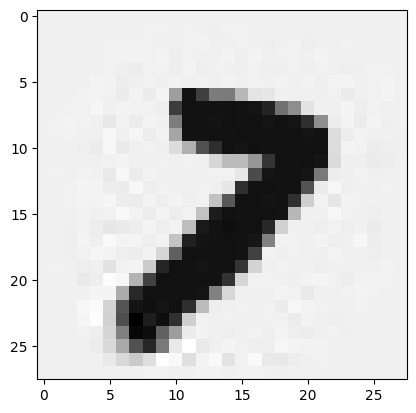

In [452]:
for j in range(200):
    if clusters[j] == 4:
        print(clusters[j])
        plt.imshow(reduc[j].reshape(28,28), cmap=plt.cm.binary)
        plt.show()

Se consigue convergencia igualmente en muy pocas iteraciones al igual que en la pregunta 2, esto es porque la compresión no modificó enormemente las imágenes, por tanto los grupos pudieron asociarse sin problema.